<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
# Write your code here


import requests
import csv
from bs4 import BeautifulSoup
list2=[]
list1=[item*10 for item in range(1,11)]

for item in list1:
  URL = 'https://citeseerx.ist.psu.edu/search?q=natural+language+processing&submit.x=0&submit.y=0&sort=rlv&t=doc'.format(item)
  page = requests.get(URL)
  soup = BeautifulSoup(page.content, 'html.parser')
  for item in soup.find_all("div",{"class":"snippet"}):
    list2.append(item.text)
import pandas as pd
df=pd.DataFrame({"AbstractData":list2})
df.to_csv("abstract.csv")
df




,AbstractData
0,"""... ..."""
1,"""... The concept of maximum entropy can be tra..."
2,"""... Scaling conditional random fields for nat..."
3,"""... The paper addresses the issue of cooperat..."
4,"""... In most natural language processing appli..."
...,...
95,"""... We propose a unified neural network archi..."
96,"""... Natural Language Processing The subject o..."
97,"""... Robots that interact with humans face-to-..."
98,"""... Natural languages are languages spoken by..."


# **Question 2: Undersand TF-IDF and Document representation**

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from textblob import Word
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
import nltk
import re
import string

df = pd.read_csv("abstract.csv")

#Removal of special characters
df["Abstract"] = df["AbstractData"].str.replace(r"[^a-zA-Z ]+", " ").str.strip()

#Removal of Punctuation 
df['Abstract'] = df['Abstract'].str.replace('[^\w\s]','')

#Removal of Numbers
df['Abstract'] = df['Abstract'].str.rstrip(string.digits)

#Removal of Stopwords 
stop = stopwords.words('english')
df['Abstract'] = df['Abstract'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Lower casing
df['Abstract'] = df['Abstract'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Abstract'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#Lemmatization
df['Abstract'] = df['Abstract'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


,Unnamed: 0,AbstractData,Abstract
0,0,"""... ...""",
1,1,"""... The concept of maximum entropy can be tra...",the concept maximum entropy traced back along ...
2,2,"""... Scaling conditional random fields for nat...",scaling conditional random field natural langu...
3,3,"""... The paper addresses the issue of cooperat...",the paper address issue cooperation linguistic...
4,4,"""... In most natural language processing appli...",in natural language processing application des...
...,...,...,...
95,95,"""... We propose a unified neural network archi...",we propose unified neural network architecture...
96,96,"""... Natural Language Processing The subject o...",natural language processing the subject natura...
97,97,"""... Robots that interact with humans face-to-...",robot interact human face face using natural l...
98,98,"""... Natural languages are languages spoken by...",natural language language spoken human current...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [ ]:
pos_tag=[]
frequency=[]
val=0
for item in df['Abstract']:
  tokenVal=nltk.word_tokenize(item)
  pos_tag.append(nltk.pos_tag(tokenVal,tagset='universal'))
  frequency.append(nltk.FreqDist(tag for (word, tag) in pos_tag[0]))
  print(pos_tag[val])
  print(frequency[val])
  val=val+1
print(frequency)


[]
<FreqDist with 0 samples and 0 outcomes>
[('the', 'DET'), ('concept', 'NOUN'), ('maximum', 'ADJ'), ('entropy', 'NOUN'), ('traced', 'VERB'), ('back', 'ADV'), ('along', 'ADV'), ('multiple', 'ADJ'), ('thread', 'ADJ'), ('biblical', 'ADJ'), ('time', 'NOUN'), ('only', 'ADV'), ('recently', 'ADV'), ('however', 'ADV'), ('computer', 'NOUN'), ('become', 'VERB'), ('powerful', 'ADJ'), ('enough', 'ADJ'), ('permit', 'NOUN'), ('widescale', 'ADJ'), ('application', 'NOUN'), ('concept', 'NOUN'), ('real', 'ADJ'), ('world', 'NOUN'), ('problem', 'NOUN'), ('statistical', 'ADJ'), ('estimation', 'NOUN'), ('pattern', 'NOUN'), ('recognition', 'NOUN'), ('in', 'ADP'), ('paper', 'NOUN'), ('de', 'NOUN')]
<FreqDist with 0 samples and 0 outcomes>
[('scaling', 'VERB'), ('conditional', 'ADJ'), ('random', 'NOUN'), ('field', 'NOUN'), ('natural', 'ADJ'), ('language', 'NOUN'), ('processing', 'VERB'), ('term', 'NOUN'), ('condition', 'NOUN'), ('term', 'NOUN'), ('condition', 'NOUN'), ('copyright', 'NOUN'), ('work', 'NOUN'),

In [ ]:
!pip install benepar
%tensorflow_version 1.x
import spacy
import benepar
from benepar.spacy_plugin import BeneparComponent
benepar.download('benepar_en3')


[nltk_data] Downloading package benepar_en3 to /root/nltk_data...
[nltk_data]   Package benepar_en3 is already up-to-date!


True

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')
from spacy import displacy
for i in df['Abstract']:
  displacy.render(nlp(i),jupyter=True)


In [ ]:
# Named Entity Recognition
import spacy
from spacy import displacy
dictVal=[]
nlp = spacy.load('en_core_web_sm')
for item in df['Abstract']:
  for entity in nlp(item).ents:
    dictVal.append((entity.label_,entity.text))
    print(entity.label_,entity.text)

PERSON minerva
ORG nlp general linguistics machine
CARDINAL one
PERSON nlp virtually
ORG algorithm
CARDINAL one
CARDINAL one
ORG nlp
PERSON minerva
ORG nlp general linguistics machine
CARDINAL one
PERSON nlp virtually
ORG algorithm
CARDINAL one
CARDINAL one
ORG nlp
PERSON minerva
ORG nlp general linguistics machine
CARDINAL one
PERSON nlp virtually
ORG algorithm
CARDINAL one
CARDINAL one
ORG nlp
PERSON minerva
ORG nlp general linguistics machine
CARDINAL one
PERSON nlp virtually
ORG algorithm
CARDINAL one
CARDINAL one
ORG nlp
PERSON minerva
ORG nlp general linguistics machine
CARDINAL one
PERSON nlp virtually
ORG algorithm
CARDINAL one
CARDINAL one
ORG nlp
PERSON minerva
ORG nlp general linguistics machine
CARDINAL one
PERSON nlp virtually
ORG algorithm
CARDINAL one
CARDINAL one
ORG nlp
PERSON minerva
ORG nlp general linguistics machine
CARDINAL one
PERSON nlp virtually
ORG algorithm
CARDINAL one
CARDINAL one
ORG nlp
PERSON minerva
ORG nlp general linguistics machine
CARDINAL one
PERSO

In [ ]:
data=df.head(100)
data

,Unnamed: 0,AbstractData,Abstract
0,0,"""... ...""",
1,1,"""... The concept of maximum entropy can be tra...",the concept maximum entropy traced back along ...
2,2,"""... Scaling conditional random fields for nat...",scaling conditional random field natural langu...
3,3,"""... The paper addresses the issue of cooperat...",the paper address issue cooperation linguistic...
4,4,"""... In most natural language processing appli...",in natural language processing application des...
...,...,...,...
95,95,"""... We propose a unified neural network archi...",we propose unified neural network architecture...
96,96,"""... Natural Language Processing The subject o...",natural language processing the subject natura...
97,97,"""... Robots that interact with humans face-to-...",robot interact human face face using natural l...
98,98,"""... Natural languages are languages spoken by...",natural language language spoken human current...


In [ ]:
data.to_csv('Final_Abstract.csv')


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.util import ngrams
my_data = open('Final_Abstract.csv', "r")
uni_Grams=ngrams(my_data.read().split(),1)
print(uni_Grams)
uni_Grams_Freq=nltk.FreqDist(uni_Grams)

<generator object ngrams at 0x7f1222083450>


In [ ]:
f = open('Final_Abstract.csv')
raw = f.read()

tokensVall = nltk.word_tokenize(raw)

#Creating bigrams
bigrams = nltk.bigrams(tokensVall)

#computing frequency distribution for all the bigrams in the text
freq_dist = nltk.FreqDist(bigrams)
for k,v in freq_dist.items():
    print(k,v)


(',', 'Unnamed') 1
('Unnamed', ':') 1
(':', '0') 1
('0', ',') 1
(',', 'AbstractData') 1
('AbstractData', ',') 1
(',', 'Abstract') 1
('Abstract', '0,0') 1
('0,0', ',') 1
(',', "''") 100
("''", "''") 400
("''", '...') 100
('...', '...') 10
('...', "''") 100
("''", ',') 100
(',', '1,1') 1
('1,1', ',') 1
('...', 'The') 20
('The', 'concept') 10
('concept', 'of') 10
('of', 'maximum') 10
('maximum', 'entropy') 20
('entropy', 'can') 10
('can', 'be') 50
('be', 'traced') 10
('traced', 'back') 20
('back', 'along') 20
('along', 'multiple') 20
('multiple', 'threads') 10
('threads', 'to') 10
('to', 'Biblical') 10
('Biblical', 'times') 10
('times', '.') 10
('.', 'Only') 10
('Only', 'recently') 10
('recently', ',') 20
(',', 'however') 10
('however', ',') 10
(',', 'have') 10
('have', 'computers') 10
('computers', 'become') 10
('become', 'powerful') 20
('powerful', 'enough') 20
('enough', 'to') 10
('to', 'permit') 10
('permit', 'the') 10
('the', 'widescale') 10
('widescale', 'application') 20
('applicat

In [ ]:
#Question 1.1 Count the frequency of all the N-grams (N=3).
#similarly for trigrams: using same methodology
#created trigram frequncies for the whole dataset

modified_data = open('Final_Abstract.csv', "r")
trigrams = ngrams(modified_data.read().split(), 3)
trigra_freq=nltk.FreqDist(trigrams)
trigra_freq

FreqDist({('(MT),', 'in', 'particular.'): 10,
          ('(NLP)', 'is', 'concerned'): 10,
          ('(NLP),', 'in', 'general,'): 10,
          (',Unnamed:', '0,AbstractData,Abstract', '0,0,"""...'): 1,
          ('...""",', '1,1,"""...', 'The'): 1,
          ('...""",', '11,11,"""...', 'The'): 1,
          ('...""",', '21,21,"""...', 'The'): 1,
          ('...""",', '31,31,"""...', 'The'): 1,
          ('...""",', '41,41,"""...', 'The'): 1,
          ('...""",', '51,51,"""...', 'The'): 1,
          ('...""",', '61,61,"""...', 'The'): 1,
          ('...""",', '71,71,"""...', 'The'): 1,
          ('...""",', '81,81,"""...', 'The'): 1,
          ('...""",', '91,91,"""...', 'The'): 1,
          ('...""",abstract', 'ambiguity', 'referred'): 10,
          ('...""",in', 'natural', 'language'): 10,
          ('...""",natural', 'language', 'language'): 10,
          ('...""",natural', 'language', 'processing'): 10,
          ('...""",robot', 'interact', 'human'): 10,
          ('...""",scaling

In [ ]:
#creating bigram for future use in the assignment
modified_data = open('Final_Abstract.csv', "r")
bigrams = ngrams(modified_data.read().split(), 2)
bigra_freq=nltk.FreqDist(bigrams)
bigra_freq

FreqDist({('(MT),', 'in'): 10,
          ('(NLP)', 'is'): 10,
          ('(NLP),', 'in'): 10,
          (',Unnamed:', '0,AbstractData,Abstract'): 1,
          ('...""",', '1,1,"""...'): 1,
          ('...""",', '11,11,"""...'): 1,
          ('...""",', '21,21,"""...'): 1,
          ('...""",', '31,31,"""...'): 1,
          ('...""",', '41,41,"""...'): 1,
          ('...""",', '51,51,"""...'): 1,
          ('...""",', '61,61,"""...'): 1,
          ('...""",', '71,71,"""...'): 1,
          ('...""",', '81,81,"""...'): 1,
          ('...""",', '91,91,"""...'): 1,
          ('...""",abstract', 'ambiguity'): 10,
          ('...""",in', 'natural'): 10,
          ('...""",natural', 'language'): 20,
          ('...""",robot', 'interact'): 10,
          ('...""",scaling', 'conditional'): 10,
          ('...""",the', 'concept'): 10,
          ('...""",the', 'paper'): 10,
          ('...""",we', 'propose'): 10,
          ('0,0,"""...', '...""",'): 1,
          ('0,AbstractData,Abstract', '0,0,"""

In [ ]:
#It is a function, which will give probability of  all the bigrams in the dataset using the given formula
def probability_bigram():
  for bigram_values in bigra_freq:
    print((" The bigram values", bigram_values,"Probability :",bigra_freq[bigram_values]/uni_Grams_Freq[(bigram_values[0],)]))

probability_bigram()


(' The bigram values', (',Unnamed:', '0,AbstractData,Abstract'), 'Probability :', 1.0)
(' The bigram values', ('0,AbstractData,Abstract', '0,0,"""...'), 'Probability :', 1.0)
(' The bigram values', ('0,0,"""...', '...""",'), 'Probability :', 1.0)
(' The bigram values', ('...""",', '1,1,"""...'), 'Probability :', 0.1)
(' The bigram values', ('1,1,"""...', 'The'), 'Probability :', 1.0)
(' The bigram values', ('The', 'concept'), 'Probability :', 0.25)
(' The bigram values', ('concept', 'of'), 'Probability :', 0.25)
(' The bigram values', ('of', 'maximum'), 'Probability :', 0.07142857142857142)
(' The bigram values', ('maximum', 'entropy'), 'Probability :', 1.0)
(' The bigram values', ('entropy', 'can'), 'Probability :', 0.5)
(' The bigram values', ('can', 'be'), 'Probability :', 1.0)
(' The bigram values', ('be', 'traced'), 'Probability :', 0.16666666666666666)
(' The bigram values', ('traced', 'back'), 'Probability :', 1.0)
(' The bigram values', ('back', 'along'), 'Probability :', 1.0)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
clean_data = open('Final_Abstract.csv', "r")

_noun = lambda pos: pos[:2] == 'NN'
tokenized = nltk.word_tokenize(clean_data.read())
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if _noun(pos)] 

print("The Nouns:\n",nouns)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
The Nouns:
 ['AbstractData', 'Abstract', 'concept', 'entropy', 'threads', 'Biblical', 'times', 'computers', 'application', 'concept', 'world', 'problems', 'estimation', 'recognition', 'paper', 'concept', 'entropy', 'time', 'computer', 'permit', 'application', 'concept', 'world', 'problem', 'estimation', 'pattern', 'recognition', 'paper', 'Scaling', 'random', 'fields', 'language', 'processing', 'Terms', 'Conditions', 'Terms', 'Conditions', 'Copyright', 'works', 'Minerva', 'Access', 'random', 'field', 'language', 'term', 'condition', 'term', 'condition', 'copyright', 'work', 'access', 'paper', 'issue', 'cooperation', 'linguistics', 'language', 'processing', 'NLP', 'linguistics', 'machine', 'translation', 'MT', 'direction', 'cooperation', 'applications', 'linguistics', 'NLP', 'paper', 'address', 'issue',

In [ ]:
import nltk
nltk.download('brown')
clean_data = open('Final_Abstract.csv', "r")

blob = TextBlob(clean_data.read())
noun_phrases = blob.noun_phrases
print(noun_phrases)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
['unnamed', 'abstractdata', 'abstract', '... ...', 'maximum entropy', 'multiple threads', 'biblical', 'widescale application', 'real world problems', 'statistical estimation', 'pattern recognition', 'des ...', 'maximum entropy', 'multiple thread biblical time', 'widescale application concept', 'real world problem', 'statistical estimation pattern recognition', 'scaling', 'conditional random fields', 'natural language processing', 'terms', 'conditions', 'terms', 'conditions', 'copyright', 'minerva access', 'conditional random field', 'natural language processing term condition term condition copyright work', 'minerva access', 'paper addresses', 'natural language processing', 'nlp', 'machine translation', 'mt', 'such cooperation', 'nlp', 'paper address issue cooperation linguistics', 'natural language processing nlp general linguistics machine translation mt', 'direction coopera

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
df_noun = pd.DataFrame(noun_phrases, columns = ['noun_phrases'])
df_noun

,noun_phrases
0,unnamed
1,abstractdata
2,abstract
3,... ...
4,maximum entropy
...,...
1058,natural language
1059,ambiguous computer
1060,language way people
1061,natural language processing nlp


In [ ]:
clean_data = open('Final_Abstract.csv', "r")
f = nltk.FreqDist(noun_phrases)
f

FreqDist({'... ...': 10,
          'abstract': 11,
          'abstract ambiguity': 10,
          'abstractdata': 1,
          'ambiguity': 10,
          'ambiguous computer': 10,
          'application linguistics nlp': 10,
          'biblical': 10,
          'broad narrow sens': 10,
          'broad sense': 20,
          'co ...': 10,
          'conditional random field': 10,
          'conditional random fields': 10,
          'conditions': 20,
          'copyright': 10,
          'currently': 10,
          'des ...': 10,
          'description logic u': 10,
          'description logics': 20,
          'development co': 10,
          'direction cooperation': 10,
          'drive semantic interpretation': 10,
          'encode knowledge base syntactic semantic pragmatic element': 10,
          'entity recognition': 10,
          'entity recognition semantic role': 10,
          'humans face-to-face': 10,
          'i ...': 10,
          'knowledge base': 10,
          'language proce

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here

# Write your code here
#calculating 
my_tf_result = (df['Abstract']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
my_tf_result.columns = ['Abstract_words','my_tf']
my_tf_result





,Abstract_words,my_tf
0,,10.0
1,concept,20.0
2,the,40.0
3,powerful,10.0
4,paper,20.0
...,...,...
156,ambiguity,10.0
157,meaning,10.0
158,ability,10.0
159,referred,10.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA

In [ ]:
tn_set = df['Abstract'].values.tolist() #train set
tt_set = "introduction statistical natural language processing snlp field lying intersection natural language processing machine learning snlp di er traditional natural language processing " #Query taken from one of the tweets which is called test set
my_tt_set = [tt_set]
stopWords = stopwords.words('english')
vzer = CountVectorizer(stop_words = stopWords)

transformer = TfidfTransformer()


In [ ]:
tnVectorizerArray = vzer.fit_transform(tn_set).toarray()
ttVectorizerArray = vzer.transform(my_tt_set).toarray()
cx = lambda a, b : np.inner(a, b)/(LA.norm(a)*LA.norm(b))
cosine_values = []

In [ ]:
for vector in tnVectorizerArray:
        for testV in ttVectorizerArray:
            cosine = cx(vector, testV)
            cosine_values.append(cosine)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_result = df.filter(['Abstract'], axis=1)
se = pd.Series(cosine_values)
df_result['Cosine_similarity'] = se.values
df_result

,Abstract,Cosine_similarity
0,,NaN
1,the concept maximum entropy traced back along ...,0.032258
2,scaling conditional random field natural langu...,0.391931
3,the paper address issue cooperation linguistic...,0.303588
4,in natural language processing application des...,0.455383
...,...,...
95,we propose unified neural network architecture...,0.312653
96,natural language processing the subject natura...,0.699942
97,robot interact human face face using natural l...,0.498847
98,natural language language spoken human current...,0.692842


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [ ]:
pip install --upgrade gensim

In [ ]:

from gensim.models import KeyedVectors


In [ ]:
from gensim import models


In [ ]:
pip install --upgrade gensim

In [ ]:
sentences = df["Abstract"] 


In [ ]:
from gensim import models


In [ ]:
from gensim.models import Word2Vec


In [ ]:
model = Word2Vec(sentences)

In [ ]:
from nltk.corpus import abc


In [ ]:
import gensim

In [ ]:
sentences

0                                                      
1     the concept maximum entropy traced back along ...
2     scaling conditional random field natural langu...
3     the paper address issue cooperation linguistic...
4     in natural language processing application des...
                            ...                        
95    we propose unified neural network architecture...
96    natural language processing the subject natura...
97    robot interact human face face using natural l...
98    natural language language spoken human current...
99    abstract ambiguity referred ability one meanin...
Name: Abstract, Length: 100, dtype: object

In [ ]:
from nltk.corpus import abc


In [ ]:
model = Word2Vec(sentences)

In [ ]:
words = list(model.wv.key_to_index.keys())


In [ ]:
model.wv.save_word2vec_format('model.bin')

In [ ]:
model.wv.save_word2vec_format('model.txt', binary=False)

In [ ]:
model.wv.save_word2vec_format('model.bin')

In [ ]:
model.wv.save_word2vec_format('model.txt', binary=False)

In [ ]:
import pickle as pkl


In [ ]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

In [ ]:
model = Word2Vec(sentences, min_count=1)


In [ ]:
print(model)


Word2Vec(vocab=14, size=100, alpha=0.025)


In [ ]:
words = list(model.wv.vocab)


In [ ]:
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [ ]:
print(model['sentence'])


[ 3.7876486e-03 -4.2745424e-04 -1.4623658e-03  3.0832214e-03
  4.2435578e-03  1.1153192e-03 -1.9514775e-04 -8.4367034e-04
 -1.3898149e-03 -5.4311607e-04 -1.3833023e-03 -6.1948522e-04
  8.7312883e-04  2.1661555e-03 -3.0379745e-03 -2.5529026e-03
  3.7629644e-03  1.3490603e-04 -4.2767082e-03  4.1918536e-03
 -5.0550152e-04 -3.1871444e-03  1.6862884e-03  4.7445623e-03
 -1.7427778e-03 -3.3224009e-03 -4.7747563e-03  8.2570512e-04
  1.7324267e-03  8.1313710e-04 -2.8220811e-03  4.9041212e-03
  3.6891864e-03  4.9890107e-03 -1.7946463e-03 -1.9223556e-04
 -2.3754707e-03  7.9905411e-04  4.8702797e-03 -2.5522960e-03
 -2.4805861e-03 -2.8581310e-03 -6.1268517e-04 -9.8654396e-05
  3.1327652e-03  4.2602206e-03  4.8708948e-03  3.6522609e-03
 -3.5521204e-03  1.5803184e-03  2.2784618e-03  1.1976223e-03
  1.8771451e-03 -1.3618238e-03 -4.9508549e-04 -4.9318993e-03
  3.1558578e-03  2.3171809e-04  3.9764554e-03 -3.9330136e-04
 -3.7662438e-03 -3.4298359e-03 -3.6470983e-03  4.2664013e-03
 -3.9600935e-03 -4.57151

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
model.save('model.bin')
new_model = Word2Vec.load('model.bin')

In [ ]:
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [ ]:
from sklearn.decomposition import PCA


In [ ]:
from matplotlib import pyplot


In [ ]:
model = Word2Vec(sentences, min_count=1)


In [ ]:
X = model[model.wv.vocab]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
pca = PCA(n_components=2)


In [ ]:
result = pca.fit_transform(X)


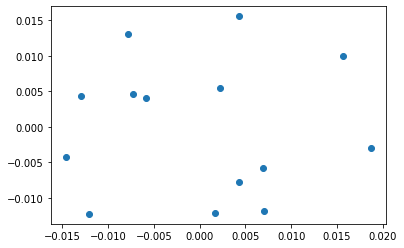

In [ ]:
pyplot.scatter(result[:, 0], result[:, 1])


In [ ]:
words = list(model.wv.vocab)


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: https://colab.research.google.com/drive/1H7S-d0tPdSXSUwoeYNwILnmQosv9eiQb#scrollTo=XfvMKJjIXS5G



